### Testing if distances can be estimated using a Beta distribution 

In [2]:
from LSH_reduction import * 
import math
import time
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch
from random import choices
import torchvision
from torchvision import transforms
import torch.nn as nn
import csv
import copy

cos_sim = lambda a,b: np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [3]:
# Downloading and getting the CIFAR100 letter dataset
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("trainset len:", len(trainset))

Files already downloaded and verified
Files already downloaded and verified
trainset len: 50000


In [45]:
# Create instance of our rp class
rp = Random_projection_hash(trainset)
rp.hash_values()
rp.estimation() ## Estimate mean and variance of distances among labels

Using: 8 bits, 10 hash tables


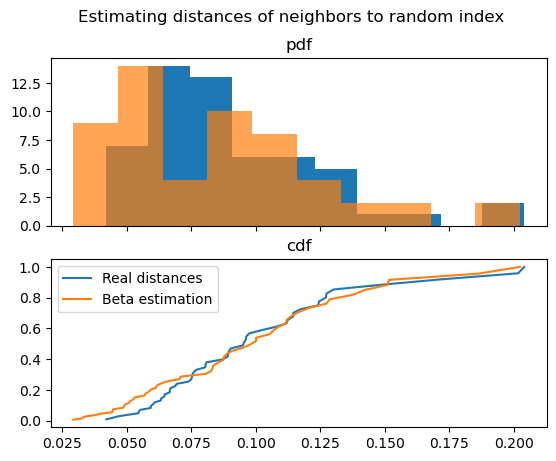

In [122]:
ix = np.random.randint(rp.array.shape[0])
vec = rp.array[ix]
distances = np.array([1-cos_sim(vec, rp.array[i]) for i in rp.find_most_alike(ix)])

mean = distances.mean()
var = distances.std()**2

## Getting the parameters of a beta distribution whose mean and variance coincide 
## with those of the neighboring indices.
alpha = (mean**2- mean**3 - mean*var)/var
beta = (alpha*var*(alpha + 1))/(mean**2-alpha*var)
estimation = np.random.beta(alpha, beta, distances.shape[0])

fig, ax = plt.subplots(2,1, sharex = True)

ax[0].hist(distances)
ax[0].hist(estimation, alpha = 0.7)
ax[0].title.set_text('pdf')

distances.sort()
estimation.sort()
ax[1].plot(distances, np.cumsum(distances)/sum(distances), label = 'Real distances')
ax[1].plot(estimation, np.cumsum(estimation)/sum(estimation), label = 'Beta estimation')
ax[1].title.set_text('cdf')
ax[1].legend()
_ = fig.suptitle('Estimating distances of neighbors to random index')

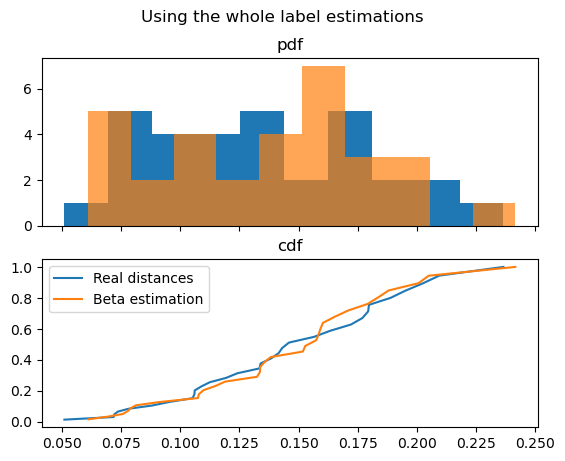

In [128]:
## Now using the whole label estimation:
ix = np.random.randint(rp.array.shape[0])
label = rp.ix_to_label[ix]

distances = np.array([1-cos_sim(vec, rp.array[i]) for i in rp.find_most_alike(ix)])

mean = rp.est_mean[label]
var = rp.est_var[label]

alpha = (mean**2- mean**3 - mean*var)/var
beta = (alpha*var*(alpha + 1))/(mean**2-alpha*var)
estimation = np.random.beta(alpha, beta, distances.shape[0])

fig, ax = plt.subplots(2,1, sharex = True)

ax[0].hist(distances)
ax[0].hist(estimation, alpha = 0.7)
ax[0].title.set_text('pdf')

distances.sort()
estimation.sort()
ax[1].plot(distances, np.cumsum(distances)/sum(distances), label = 'Real distances')
ax[1].plot(estimation, np.cumsum(estimation)/sum(estimation), label = 'Beta estimation')
ax[1].title.set_text('cdf')
ax[1].legend()
_ = fig.suptitle('Using the whole label estimations')